# Exploratory Data Analysis

## Imports

In [94]:
import IPython.display as ipd
import librosa # Compatible with python 3.10
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

## Constants

#### Directories

In [95]:
# Assign paths
base_dir = "dataset"

# Use for-norm dataset
train_dir = os.path.join(base_dir, "for-norm", "for-norm", "training")
test_dir = os.path.join(base_dir, "for-norm", "for-norm", "testing")
val_dir = os.path.join(base_dir, "for-norm", "for-norm", "validation")

# Classified directories
train_dir_fake = os.path.join(train_dir, "fake")
train_dir_real = os.path.join(train_dir, "real")
test_dir_fake = os.path.join(test_dir, "fake")
test_dir_real = os.path.join(test_dir, "real")
val_dir_fake = os.path.join(val_dir, "fake")
val_dir_real = os.path.join(val_dir, "real")

In [96]:
# Check for mistakes
print("Base directory:", base_dir)
print()
print("Train directory:", train_dir)
print("Test directory:", test_dir)
print("Val directory:", val_dir)
print()
print("Train (fake) directory:", train_dir_fake)
print("Train (real) directory:", train_dir_real)
print("Test (fake) directory:", test_dir_fake)
print("Test (real) directory:", test_dir_real)
print("Val (fake) directory:", val_dir_fake)
print("Val (real) directory:", val_dir_real)

Base directory: dataset

Train directory: dataset/for-norm/for-norm/training
Test directory: dataset/for-norm/for-norm/testing
Val directory: dataset/for-norm/for-norm/validation

Train (fake) directory: dataset/for-norm/for-norm/training/fake
Train (real) directory: dataset/for-norm/for-norm/training/real
Test (fake) directory: dataset/for-norm/for-norm/testing/fake
Test (real) directory: dataset/for-norm/for-norm/testing/real
Val (fake) directory: dataset/for-norm/for-norm/validation/fake
Val (real) directory: dataset/for-norm/for-norm/validation/real


## Obtain Data

In [97]:
# Obtain waveform (.wav) audio files
train_fake_audio_path = [os.path.join(train_dir_fake, file) for file in os.listdir(train_dir_fake) if file.endswith('.wav')]
train_real_audio_path = [os.path.join(train_dir_real, file) for file in os.listdir(train_dir_real) if file.endswith('.wav')]

validation_fake_audio_path = [os.path.join(val_dir_fake, file) for file in os.listdir(val_dir_fake) if file.endswith('.wav')]
validation_real_audio_path = [os.path.join(val_dir_real, file) for file in os.listdir(val_dir_real) if file.endswith('.wav')]

test_fake_audio_path = [os.path.join(test_dir_fake, file) for file in os.listdir(test_dir_fake) if file.endswith('.wav')]
test_real_audio_path = [os.path.join(test_dir_real, file) for file in os.listdir(test_dir_real) if file.endswith('.wav')]

In [98]:
# Display a random real training sample audio
random_real_training_audio_file = train_real_audio_path[random.randint(0, 333)]
ipd.Audio(random_real_training_audio_file)

In [99]:
# Display a random fake training sample audio
random_fake_training_audio_file = train_fake_audio_path[random.randint(0, 333)]
ipd.Audio(random_fake_training_audio_file)


## Visualize Data

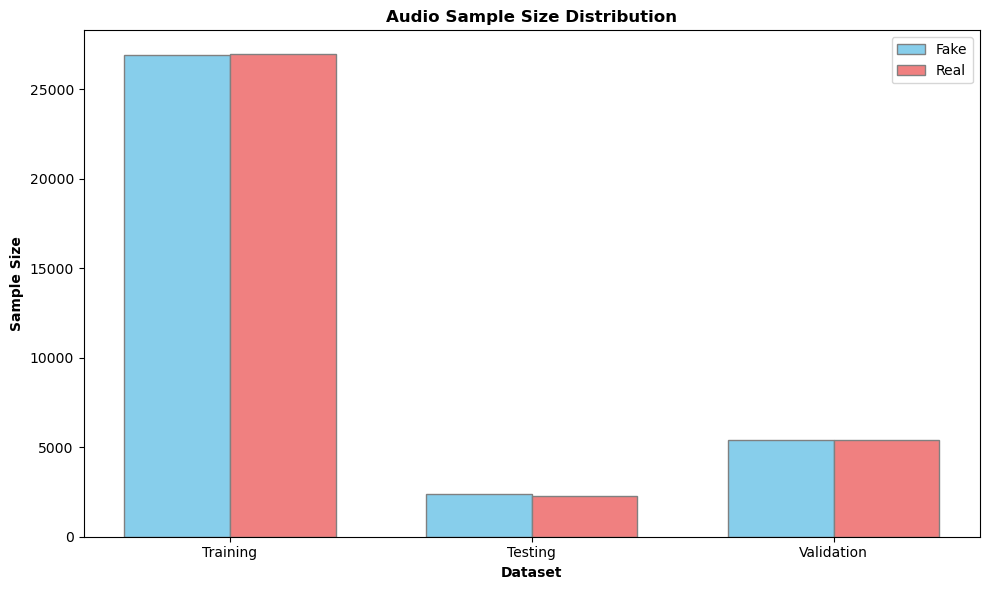

Training fake audio sample size: 26927
Training real audio sample size: 26941
Testing fake audio sample size: 2370
Testing real audio sample size: 2264
Validation fake audio sample size: 5398
Validation real audio sample size: 5400


In [100]:
# Look for data imbalances

# Display in a graph format

# Data for the bar graph
datasets = ["Training", "Testing", "Validation"]
fake_sample_counts = [len(train_fake_audio_path), len(test_fake_audio_path), len(validation_fake_audio_path)]
real_sample_counts = [len(train_real_audio_path), len(test_real_audio_path), len(validation_real_audio_path)]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(datasets))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, fake_sample_counts, color="skyblue", width=bar_width, edgecolor="grey", label="Fake")
plt.bar(r2, real_sample_counts, color="lightcoral", width=bar_width, edgecolor="grey", label="Real")

# Add labels and title
plt.xlabel("Dataset", fontweight="bold")
plt.ylabel("Sample Size", fontweight="bold")
plt.xticks([r + bar_width/2 for r in range(len(datasets))], datasets)
plt.title("Audio Sample Size Distribution", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

# Display in numerical form
print("Training fake audio sample size:", len(train_fake_audio_path))
print("Training real audio sample size:", len(train_real_audio_path))
print("Testing fake audio sample size:", len(test_fake_audio_path))
print("Testing real audio sample size:", len(test_real_audio_path))
print("Validation fake audio sample size:", len(validation_fake_audio_path))
print("Validation real audio sample size:", len(validation_real_audio_path))

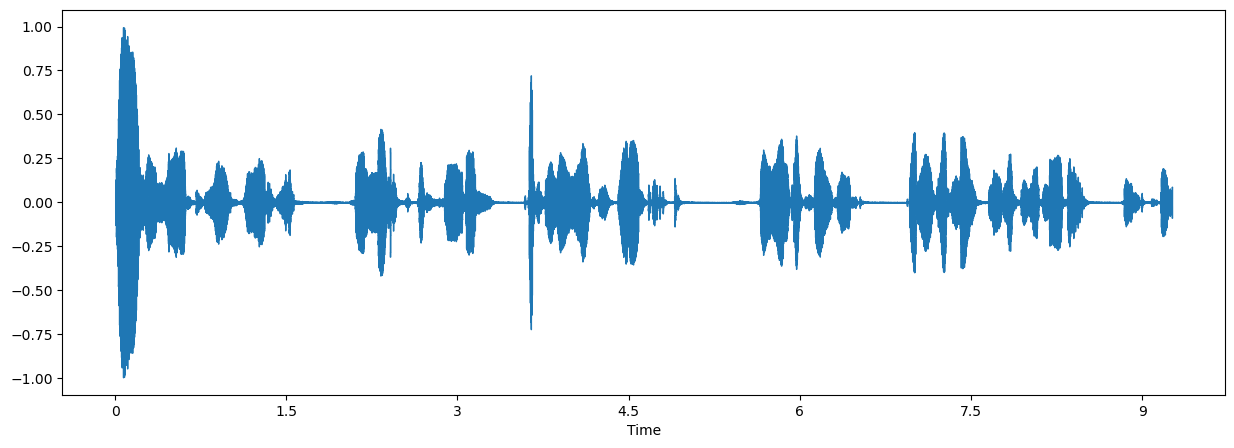

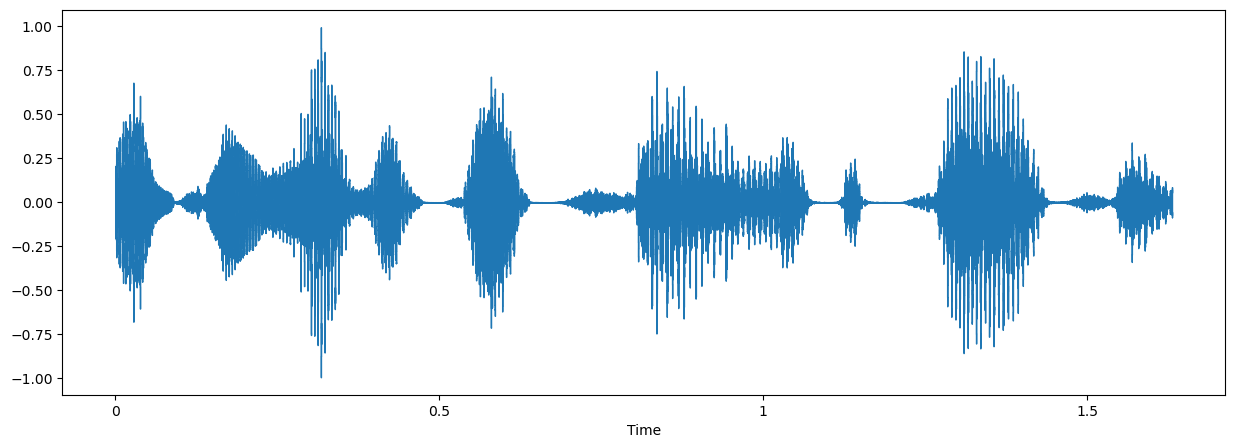

In [101]:
# Visualize waveform of 2 random trainimg sample audio

# sr (sample rate) refers to the frequency of "snapshots" of the audio used for digital representation

# The random real trainimg sample audio
audio_data, sample_rate = librosa.load(random_real_training_audio_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)

# The random fake trainimg sample audio
audio_data, sample_rate = librosa.load(random_fake_training_audio_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sample_rate)


In [102]:
# Convert audio file to spectrogram
# def create_spectrogram(file_path):
#     audio_data, sample_rate = librosa.load(file_path)
#     spectrogram = librosa.stft(audio_data)
#     decibel_spectrogram = librosa.amplitude_to_db(abs(spectrogram))
#     return decibel_spectrogram

# Convert audio file to mel-scale spectrogram
# See https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53
def create_mel_spectrogram(file_path):
    audio_data, sample_rate = librosa.load(file_path)  
    # Convert audio to mel-based spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    # Convert from amplitude squared to decibel units
    mel_decibel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  
    return mel_decibel_spectrogram

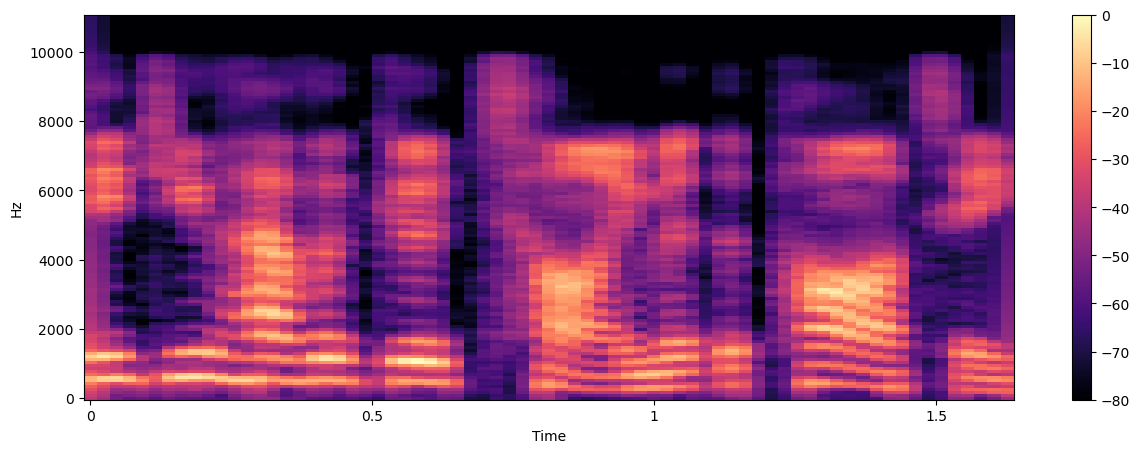

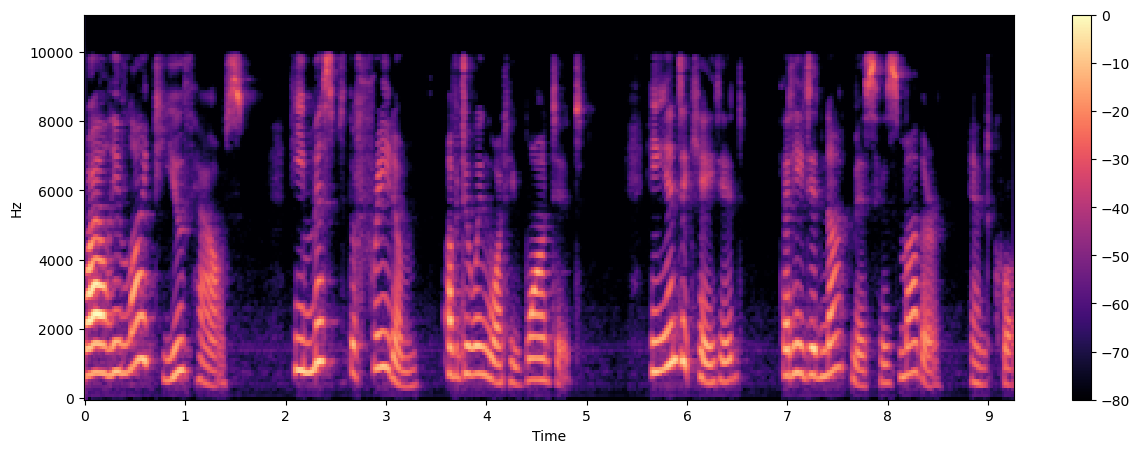

In [103]:
# Spectrogram representation of the random fake training sample wave form above
sample_fake_training_spectrogram = create_mel_spectrogram(random_fake_training_audio_file)
plt.figure(figsize=(15, 5))
librosa.display.specshow(sample_fake_training_spectrogram, x_axis='time', y_axis='hz')
plt.colorbar()

# Spectrogram representation of the random real training sample wave form above
sample_real_training_spectrogram = create_mel_spectrogram(random_real_training_audio_file)
plt.figure(figsize=(15, 5))
librosa.display.specshow(sample_real_training_spectrogram, x_axis='time', y_axis='hz')
plt.colorbar()

Audio loaded with sample rate: 22050


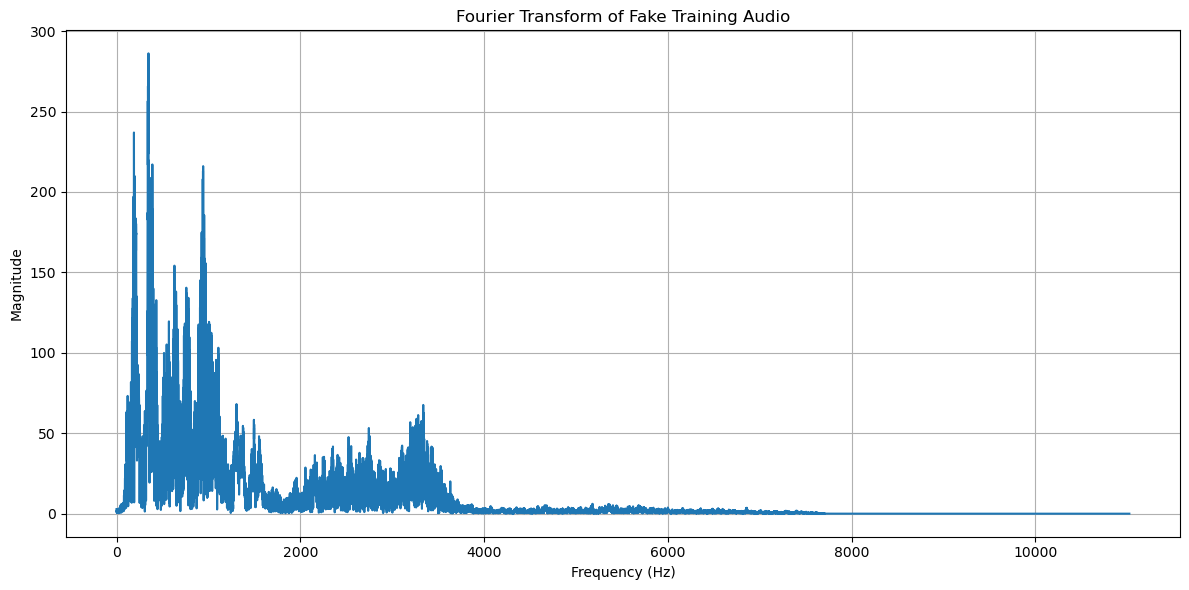

Audio loaded with sample rate: 22050


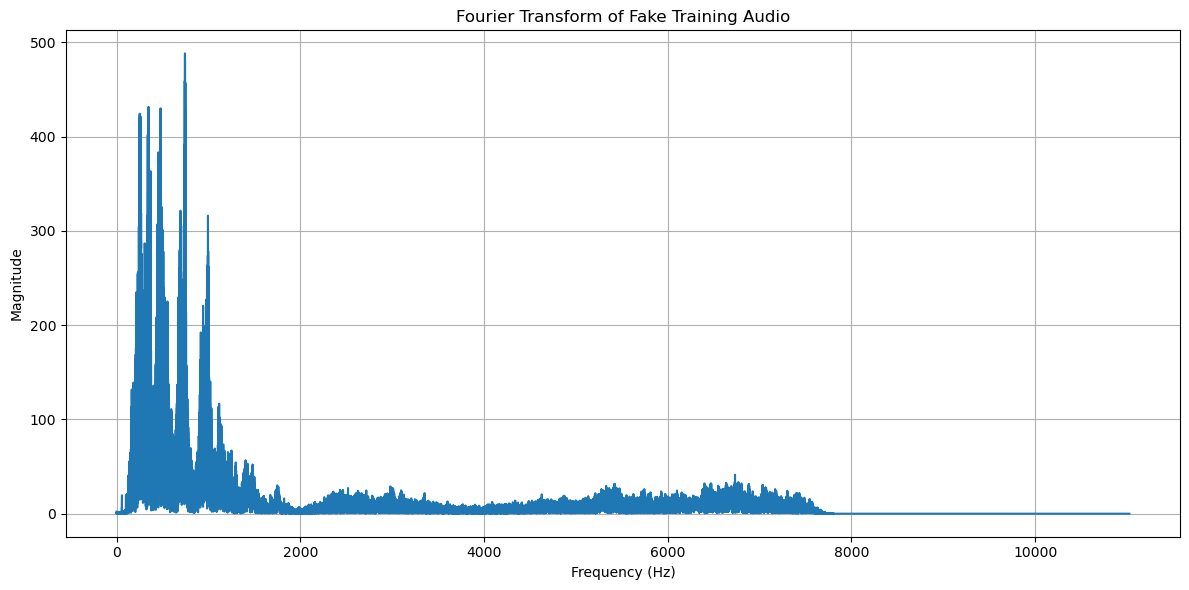

In [104]:
# Displaying a magnitude spectrum for the fake training audio sample
audio_data, sample_rate = librosa.load(random_fake_training_audio_file)
print(f"Audio loaded with sample rate: {sample_rate}")

# Perform Fourier Transform using NumPy's FFT
n_fft = len(audio_data)
frequencies = np.fft.fftfreq(n_fft, d=1/sample_rate)
fft_values = np.fft.fft(audio_data)

# Calculate the magnitude of the frequency components
magnitude_spectrum = np.abs(fft_values)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n_fft//2], magnitude_spectrum[:n_fft//2])  # Plot only the positive frequencies
plt.title('Fourier Transform of Fake Training Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying a magnitude spectrum for the real training audio sample
audio_data, sample_rate = librosa.load(random_real_training_audio_file)
print(f"Audio loaded with sample rate: {sample_rate}")

# Perform Fourier Transform using NumPy's FFT
n_fft = len(audio_data)
frequencies = np.fft.fftfreq(n_fft, d=1/sample_rate)
fft_values = np.fft.fft(audio_data)

# Calculate the magnitude of the frequency components
magnitude_spectrum = np.abs(fft_values)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:n_fft//2], magnitude_spectrum[:n_fft//2])  # Plot only the positive frequencies
plt.title('Fourier Transform of Fake Training Audio')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()